## Key Findings: 
1.	Being a medical/patient dataset it is odd that gender is not one of the attributes in it
2.	Around 80% of the patients are admitted to the Gynecology department
3.	Finally it seems that dataset is heavily engineered as some feature combinations do not make sense in a medical sense ex. length of hospital stay does not correlate with severity at admission

### Through our EDA, we were able to find several things of interest from the dataset. 
1.	Much of the data does not seem to be correlated with their length of stay and is generally evenly distributed across all groups. For example, the severity of an individual’s admission to the hospital does not appear to correlate with their length of stay. 
2.	Although we were restricted by our dataset not including the gender of the patient, we found that most individuals are most likely women as most of patients were going into the gynecology department for treatment. 
3.	By looking through the different region codes and hospital codes we also found that individuals (patientid) had several different entries for their stay in the hospital, and occasionally moved to different hospitals for each stay.
4.	There was a data formatting issue in the stay field that converted a text value (’11-20’) was switched to 20-Nov.  Two of the attributes ‘Bed Grade’ and ‘Patient_City_Code’ attributes have null values.


In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import csv

In [6]:
# train = np.genfromtxt('train.csv', delimiter=',', dtype=None)
# test = np.genfromtxt('test.csv', delimiter=',', dtype=None)
df = pd.read_csv("train.csv")

In [7]:
print(df.shape)

(318438, 18)


In [8]:
df.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449,11-20
1,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
2,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056,31-40
3,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167,0-10
4,12,26,b,2,Y,4,radiotherapy,R,D,1.0,31397,7.0,Urgent,Extreme,2,51-60,5993,11-20
5,11,22,g,9,Y,2,radiotherapy,S,B,2.0,31397,7.0,Urgent,Extreme,2,51-60,5797,21-30
6,14,9,d,5,Z,3,radiotherapy,S,F,3.0,31397,7.0,Urgent,Extreme,2,51-60,8477,21-30
7,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
8,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
9,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10


In [9]:
# basic shape, data type, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [10]:
print(df['City_Code_Patient'].unique())
print(df['Bed Grade'].unique())

[ 7.  3.  8.  2.  5.  6.  4.  1.  9. 14. nan 25. 15. 12. 10. 28. 24. 23.
 20. 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35.
 36. 38.]
[ 2.  3.  1.  4. nan]


In [11]:
print(df['City_Code_Patient'].describe().transpose())
print("\n")
print(df['Bed Grade'].describe().transpose())

count    313906.000000
mean          7.251859
std           4.745266
min           1.000000
25%           4.000000
50%           8.000000
75%           8.000000
max          38.000000
Name: City_Code_Patient, dtype: float64


count    318325.000000
mean          2.625807
std           0.873146
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: Bed Grade, dtype: float64


In [12]:
df['patient_city_code'] = df['City_Code_Patient'].apply(lambda x: 8 if pd.isnull(x) else x)
df['bed_grade'] = df['Bed Grade'].apply(lambda x: 3 if pd.isnull(x) else x)

In [13]:
print(df['patient_city_code'].unique())
print(df['bed_grade'].unique())

[ 7.  3.  8.  2.  5.  6.  4.  1.  9. 14. 25. 15. 12. 10. 28. 24. 23. 20.
 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35. 36.
 38.]
[2. 3. 1. 4.]


In [14]:
df['patient_city_code'].describe().transpose()

count    318438.000000
mean          7.262506
std           4.712210
min           1.000000
25%           4.000000
50%           8.000000
75%           8.000000
max          38.000000
Name: patient_city_code, dtype: float64

In [15]:
# basic shape, data type, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [16]:
print(df.dropna().shape)

(313793, 20)


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276847,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors with Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0
patient_city_code,318438.0,7.262506,4.712210,1.0,4.00,8.0,8.00,38.0


In [18]:
df['stay'] = df['Stay'].apply(lambda x: '11-20' if x == '20-Nov' else x)
df['stay'] = df['stay'].apply(lambda x: '>100' if x == 'More than 100 Days' else x)
df.stay[46]

'0-10'

In [19]:
le = preprocessing.LabelEncoder()

In [20]:
department_encoded=le.fit_transform(df.Department)
age_encoded = le.fit_transform(df.Age)
admission_encoded=le.fit_transform(df['Type of Admission'])
stay_encoded = le.fit_transform(df.stay)
severity_encoded = le.fit_transform(df['Severity of Illness'])
ward_type_encoded = le.fit_transform(df['Ward_Type'])
ward_facility_encoded = le.fit_transform(df['Ward_Facility_Code'])
hospital_region_encoded = le.fit_transform(df['Hospital_region_code'])
hospital_type_encoded = le.fit_transform(df['Hospital_type_code'])

In [21]:
df['department_encoded'] = department_encoded
df['age_encoded'] = age_encoded
df['admission_encoded'] = admission_encoded
df['stay_encoded'] = stay_encoded
df['severity_encoded'] = severity_encoded
df['ward_type_encoded'] = ward_type_encoded
df['ward_facility_encoded'] = ward_facility_encoded
df['hospital_region_encoded'] = hospital_region_encoded
df['hospital_type_encoded'] = hospital_type_encoded


stay_encoded 



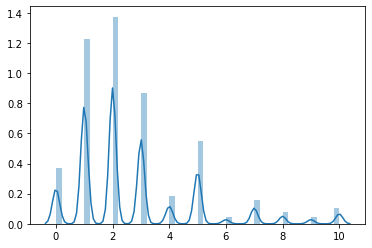

['11-20' '31-40' '0-10' '21-30' '41-50' '51-60' '71-80' '>100' '81-90'
 '61-70' '91-100']
[ 1  3  0  2  4  5  7 10  8  6  9]


In [22]:
print("\nstay_encoded \n")
sns.distplot(stay_encoded)
plt.show()
print(df.stay.unique())
print(df.stay_encoded.unique())
# df[['stay_encoded', 'stay']] 

age_encoded 



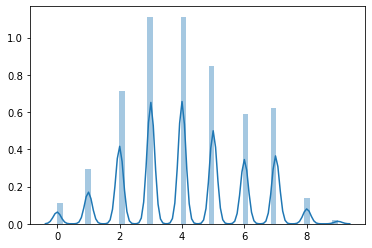

['51-60' '61-70' '71-80' '31-40' '41-50' '81-90' '21-30' '20-Nov' '0-10'
 '91-100']
[5 6 7 3 4 8 2 1 0 9]


In [23]:
print("age_encoded \n")
sns.distplot(age_encoded)
plt.show()
print(df.Age.unique())
print(df.age_encoded.unique())
# df[['age_encoded', 'Age']] 

admission_encoded 



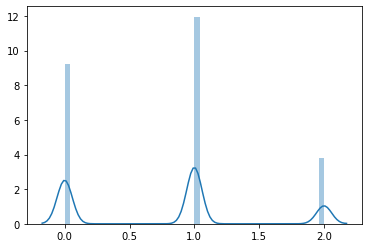

['Trauma' 'Emergency' 'Urgent']
[1 0 2]


In [24]:
print("admission_encoded \n")
sns.distplot(admission_encoded)
plt.show()
print(df['Type of Admission'].unique())
print(df['admission_encoded'].unique())
# df[['admission_encoded', 'Type of Admission']] 

severity_encoded 



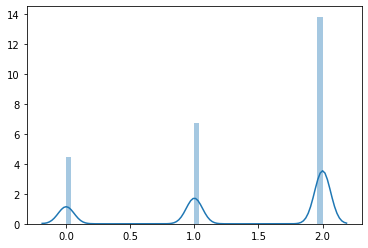

['Extreme' 'Moderate' 'Minor']
[0 2 1]


In [25]:
print("severity_encoded \n")
sns.distplot(severity_encoded)
plt.show()
print(df['Severity of Illness'].unique())
print(df['severity_encoded'].unique())
# df[['severity_encoded','Severity of Illness']]


department_encoded 



C:\Users\siva_\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


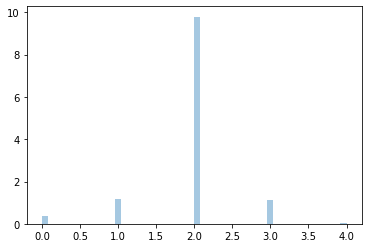

['anesthesia' 'gynecology' 'radiotherapy' 'TB & Chest disease' 'surgery']
[1 2 3 0 4]


In [26]:
print("\ndepartment_encoded \n")
sns.distplot(department_encoded)
plt.show()
print(df['Department'].unique())
print(df['department_encoded'].unique())
# df[['department_encoded', 'Department']] 

ward_facility_encoded 



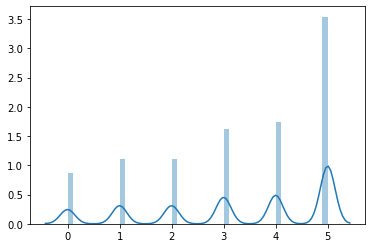

['F' 'E' 'B' 'D' 'A' 'C']
[5 4 1 3 0 2]


In [27]:
print("ward_facility_encoded \n")
sns.distplot(ward_facility_encoded)
plt.show()
print(df['Ward_Facility_Code'].unique())
print(df['ward_facility_encoded'].unique())
# df[['ward_facility_encoded', 'Ward_Facility_Code']] 

hospital_region_encoded 



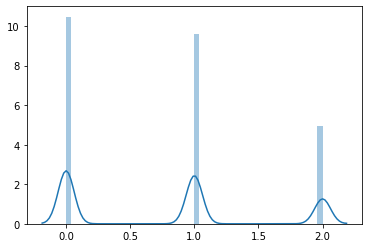

['X' 'Y' 'Z']
[0 1 2]


In [28]:
print("hospital_region_encoded \n")
sns.distplot(hospital_region_encoded)
plt.show()
print(df['Hospital_region_code'].unique())
print(df['hospital_region_encoded'].unique())
# df[['hospital_region_encoded', 'Hospital_region_code']] 

hospital_type_encoded 



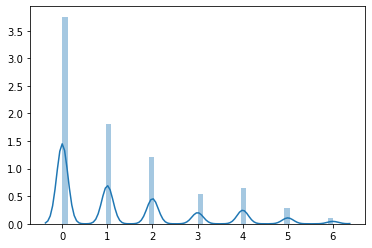

['a' 'e' 'f' 'b' 'g' 'd' 'c']
[0 4 5 1 6 3 2]


In [29]:
print("hospital_type_encoded \n")
sns.distplot(hospital_type_encoded)
plt.show()
print(df['Hospital_type_code'].unique())
print(df['hospital_type_encoded'].unique())
# df[['hospital_type_encoded', 'Hospital_type_code']] 

ward_type_encoded 



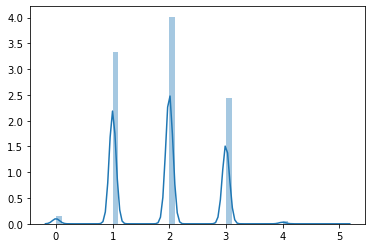

['S' 'R' 'Q' 'P' 'T' 'U']
[3 2 1 0 4 5]


In [30]:
print("ward_type_encoded \n")
sns.distplot(ward_type_encoded)
plt.show()
print(df['Ward_Type'].unique())
print(df['ward_type_encoded'].unique())
# df[['ward_type_encoded', 'Ward_Type']] 

hospital_code 



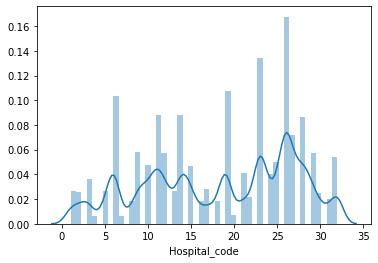

[23 10 32 26 22  9  8  2 16 21  6 29 12  3 28 27 19  5 14 13 31 24 17 25
 15 11  1 30 18  4  7 20]


In [31]:
print("hospital_code \n")
sns.distplot(df.Hospital_code)
plt.show()
print(df['Hospital_code'].unique())

In [32]:
print("\nAdmission_Deposit - Ward_Type\n")
print(df['Admission_Deposit'].groupby(df['Ward_Type']).describe())
print("\nAdmission_Deposit - Department\n")
print(df['Admission_Deposit'].groupby(df['Department']).describe())
print("\nAdmission_Deposit - Hospital_type_code\n")
print(df['stay_encoded'].groupby(df['Hospital_type_code']).describe())
print("\nstay_encoded - Hospital_code\n")
print(df['stay_encoded'].groupby(df['Hospital_code']).describe())

print("\nstay_encoded - Bed Grade\n")
print(df['stay_encoded'].groupby(df['Bed Grade']).describe())



Admission_Deposit - Ward_Type

              count         mean          std     min      25%     50%  \
Ward_Type                                                                
P            5046.0  4733.466706  1109.328035  1801.0  4022.25  4557.5   
Q          106165.0  4785.998031  1061.359356  1802.0  4112.00  4638.0   
R          127947.0  4942.327643  1082.935664  1800.0  4264.00  4810.0   
S           77794.0  4922.343111  1114.755835  1811.0  4194.00  4784.0   
T            1477.0  4672.391334  1113.086027  1934.0  3963.00  4581.0   
U               9.0  4404.888889   535.781076  3420.0  4254.00  4399.0   

              75%      max  
Ward_Type                   
P          5263.0  10553.0  
Q          5289.0  11008.0  
R          5464.0  11008.0  
S          5485.0  11008.0  
T          5162.0   9994.0  
U          4611.0   5171.0  

Admission_Deposit - Department

                       count         mean          std     min     25%  \
Department                          

In [33]:
print("\nAdmission_Deposit - Ward_Type\n")
print(df['Admission_Deposit'].groupby(df['Ward_Type']).describe())
print("\nAdmission_Deposit - Department\n")
print(df['Admission_Deposit'].groupby(df['Department']).describe())
print("\nAdmission_Deposit - Hospital_type_code\n")
print(df['Admission_Deposit'].groupby(df['Hospital_type_code']).describe())
print("\nAdmission_Deposit - Hospital_code\n")
print(df['Admission_Deposit'].groupby(df['Hospital_code']).describe())
print("\nAdmission_Deposit - Bed Grade\n")
print(df['Admission_Deposit'].groupby(df['Bed Grade']).describe())


Admission_Deposit - Ward_Type

              count         mean          std     min      25%     50%  \
Ward_Type                                                                
P            5046.0  4733.466706  1109.328035  1801.0  4022.25  4557.5   
Q          106165.0  4785.998031  1061.359356  1802.0  4112.00  4638.0   
R          127947.0  4942.327643  1082.935664  1800.0  4264.00  4810.0   
S           77794.0  4922.343111  1114.755835  1811.0  4194.00  4784.0   
T            1477.0  4672.391334  1113.086027  1934.0  3963.00  4581.0   
U               9.0  4404.888889   535.781076  3420.0  4254.00  4399.0   

              75%      max  
Ward_Type                   
P          5263.0  10553.0  
Q          5289.0  11008.0  
R          5464.0  11008.0  
S          5485.0  11008.0  
T          5162.0   9994.0  
U          4611.0   5171.0  

Admission_Deposit - Department

                       count         mean          std     min     25%  \
Department                          

In [34]:
print("\nAvailable Extra Rooms in Hospital - Ward_Type\n")
print(df['Available Extra Rooms in Hospital'].groupby(df['Ward_Type']).describe())
print("\nAvailable Extra Rooms in Hospital - Department\n")
print(df['Available Extra Rooms in Hospital'].groupby(df['Department']).describe())
print("\nAvailable Extra Rooms in Hospital - Hospital_type_code\n")
print(df['Available Extra Rooms in Hospital'].groupby(df['Hospital_type_code']).describe())
print("\nAvailable Extra Rooms in Hospital - Hospital_code\n")
print(df['Available Extra Rooms in Hospital'].groupby(df['Hospital_code']).describe())
print("\nAvailable Extra Rooms in Hospital - Bed Grade\n")
print(df['Available Extra Rooms in Hospital'].groupby(df['Bed Grade']).describe())


Available Extra Rooms in Hospital - Ward_Type

              count      mean       std  min  25%  50%  75%   max
Ward_Type                                                        
P            5046.0  5.277051  1.819762  1.0  4.0  5.0  6.0  13.0
Q          106165.0  3.733076  1.210254  0.0  3.0  4.0  4.0  12.0
R          127947.0  3.072053  0.952135  0.0  2.0  3.0  4.0  21.0
S           77794.0  2.548333  0.864213  0.0  2.0  2.0  3.0  24.0
T            1477.0  2.680433  0.725627  1.0  2.0  3.0  3.0   6.0
U               9.0  3.555556  0.726483  2.0  3.0  4.0  4.0   4.0

Available Extra Rooms in Hospital - Department

                       count      mean       std  min  25%  50%  75%   max
Department                                                                
TB & Chest disease    9586.0  3.016065  1.249122  1.0  2.0  3.0  4.0  12.0
anesthesia           29649.0  2.819555  1.038269  1.0  2.0  3.0  4.0  14.0
gynecology          249486.0  3.267831  1.166204  0.0  2.0  3.0  4.0  21.0


In [35]:
print("\nAvailable Extra Rooms in Hospital\n")
print(df[['Available Extra Rooms in Hospital','Admission_Deposit']].groupby(df['Department']).describe())


Available Extra Rooms in Hospital

                   Available Extra Rooms in Hospital                           \
                                               count      mean       std  min   
Department                                                                      
TB & Chest disease                            9586.0  3.016065  1.249122  1.0   
anesthesia                                   29649.0  2.819555  1.038269  1.0   
gynecology                                  249486.0  3.267831  1.166204  0.0   
radiotherapy                                 28516.0  3.043204  1.189922  0.0   
surgery                                       1201.0  3.063281  1.104231  1.0   

                                        Admission_Deposit               \
                    25%  50%  75%   max             count         mean   
Department                                                               
TB & Chest disease  2.0  3.0  4.0  12.0            9586.0  5144.285834   
anesthesia         

In [36]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'patient_city_code', 'bed_grade', 'stay',
       'department_encoded', 'age_encoded', 'admission_encoded',
       'stay_encoded', 'severity_encoded', 'ward_type_encoded',
       'ward_facility_encoded', 'hospital_region_encoded',
       'hospital_type_encoded'],
      dtype='object')

In [37]:
# sns.pairplot(df[['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
#        'Hospital_region_code', 'Available Extra Rooms in Hospital',
#        'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
#        'patientid', 'City_Code_Patient', 'Type of Admission',
#        'Severity of Illness', 'Visitors with Patient', 'Age',
#        'Admission_Deposit', 'Stay', 'department_encoded', 'age_encoded',
#        'admission_encoded', 'stay_encoded', 'severity_encoded',
#        'ward_type_encoded', 'ward_facility_encoded', 'hospital_region_encoded',
#        'hospital_type_encoded']], height=1.5)

In [38]:
corrMatrix = df.corr()
corrMatrix.style.background_gradient()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,patient_city_code,bed_grade,department_encoded,age_encoded,admission_encoded,stay_encoded,severity_encoded,ward_type_encoded,ward_facility_encoded,hospital_region_encoded,hospital_type_encoded
case_id,1.000000,-0.043023,-0.011352,0.042580,0.013702,-0.004150,0.065196,0.001309,-0.045972,0.065207,0.013691,-0.002175,-0.114694,0.076789,-0.053882,0.013935,-0.029183,-0.011546,0.006262,0.001877
Hospital_code,-0.043023,1.000000,0.128294,-0.059638,-0.013739,0.002291,-0.015530,-0.028500,0.045446,-0.015477,-0.013948,0.000777,0.016322,-0.014268,0.042846,-0.007585,0.161108,-0.132347,-0.135920,0.039449
City_Code_Hospital,-0.011352,0.128294,1.000000,-0.045771,-0.049309,0.000750,-0.023988,0.018184,-0.034455,-0.024161,-0.049248,0.029308,0.020507,-0.015547,0.006381,-0.000018,0.122285,-0.100474,0.008311,-0.000839
Available Extra Rooms in Hospital,0.042580,-0.059638,-0.045771,1.000000,-0.115868,0.000921,-0.009681,0.096714,-0.143739,-0.009462,-0.115804,0.047726,-0.133491,-0.016498,-0.121120,0.015053,-0.433849,0.050453,-0.006906,-0.103044
Bed Grade,0.013702,-0.013739,-0.049309,-0.115868,1.000000,0.001645,-0.008105,0.088945,0.073833,-0.007530,1.000000,-0.096783,0.001732,0.126148,0.025741,0.050024,-0.013442,0.075848,-0.042534,0.018769
patientid,-0.004150,0.002291,0.000750,0.000921,0.001645,1.000000,0.002002,0.006889,-0.000877,0.002009,0.001638,0.002217,-0.001505,0.002498,0.001125,0.004444,0.000615,0.001923,-0.002083,-0.003010
City_Code_Patient,0.065196,-0.015530,-0.023988,-0.009681,-0.008105,0.002002,1.000000,-0.012074,0.025837,1.000000,-0.008157,0.019640,-0.016406,-0.026716,-0.009704,-0.007850,0.015979,-0.140921,0.152279,0.055746
Visitors with Patient,0.001309,-0.028500,0.018184,0.096714,0.088945,0.006889,-0.012074,1.000000,-0.150358,-0.011677,0.088920,0.026054,0.073795,-0.097966,0.537537,-0.020670,-0.096451,0.022088,-0.019485,-0.045213
Admission_Deposit,-0.045972,0.045446,-0.034455,-0.143739,0.073833,-0.000877,0.025837,-0.150358,1.000000,0.025485,0.073779,-0.080754,0.025182,0.043352,-0.052077,0.023993,0.050825,-0.023057,0.075092,0.025341
patient_city_code,0.065207,-0.015477,-0.024161,-0.009462,-0.007530,0.002009,1.000000,-0.011677,0.025485,1.000000,-0.007581,0.019500,-0.016282,-0.026921,-0.009447,-0.007774,0.015692,-0.139691,0.150714,0.055272


In [39]:
# axis = 1 below means dropping by columns, 0 means by rows
X = df.drop(['Department','Age', 'Type of Admission', 'Severity of Illness','Ward_Type','Ward_Facility_Code','Hospital_region_code', 'Hospital_type_code','Stay', 'stay'], axis=1)
y = df['stay_encoded']
print(X.info())
print("\n")
print(y.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Bed Grade                          318325 non-null  float64
 5   patientid                          318438 non-null  int64  
 6   City_Code_Patient                  313906 non-null  float64
 7   Visitors with Patient              318438 non-null  int64  
 8   Admission_Deposit                  318438 non-null  int64  
 9   patient_city_code                  318438 non-null  float64
 10  bed_grade                          318438 non-null  float64
 11  department_encoded                 3184

### Split data into train and test

In [41]:
# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(254750, 20)
(63688, 20)
(254750,)
(63688,)


In [42]:
# basic stats
X_train.describe(include='all')
# print(X_train.columns())
X_train.columns

Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'patient_city_code', 'bed_grade', 'department_encoded', 'age_encoded',
       'admission_encoded', 'stay_encoded', 'severity_encoded',
       'ward_type_encoded', 'ward_facility_encoded', 'hospital_region_encoded',
       'hospital_type_encoded'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025FF67AC910>,
      dtype=object)

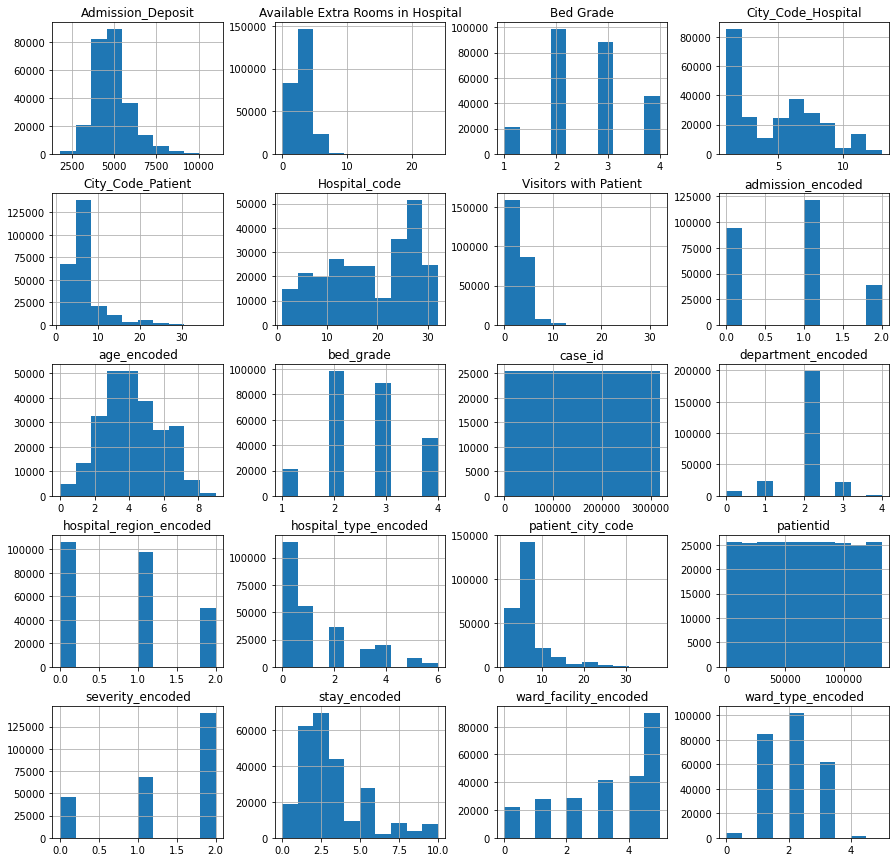

In [43]:
# histograms for all numerical features
X_train.hist(figsize=(15,15))

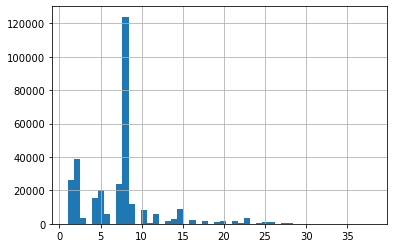

In [44]:
# key findings with potential processing
# long tail (skewed left): log transformation
# some outliers: outlier removal
df['City_Code_Patient'].hist(bins=50)

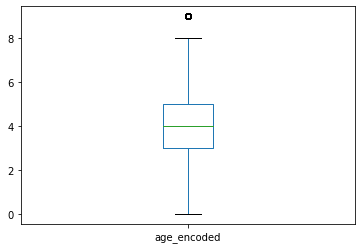

In [45]:
df['age_encoded'].plot.box()

Text(0, 0.5, 'Admission_Deposit')

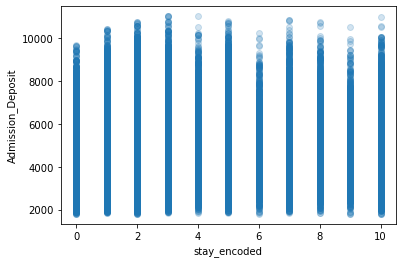

In [46]:
fig, ax = plt.subplots()
ax.scatter(x=X_train['stay_encoded'], y=X_train['Admission_Deposit'], alpha=0.2) # alpha=0.2 specifies the opacity
ax.set_xlabel('stay_encoded')
ax.set_ylabel('Admission_Deposit')

### Split data into train and test

In [47]:
# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(254750, 20)
(63688, 20)
(254750,)
(63688,)


In [48]:
# X_train['patientid'].groupby(X_train.patientid).agg('count').reset_index(name="visit_count")
X['patientid'].groupby(X.patientid).agg('count').reset_index(name="visit_count")

,patientid,visit_count
0,1,4
1,2,2
2,4,2
3,6,1
4,7,4
...,...,...
92012,131620,9
92013,131621,3
92014,131622,4
92015,131623,2


In [49]:
# visit_count = pd.DataFrame(X_train['patientid'].groupby(X_train.patientid).agg('count').reset_index(name="visit_count"))
visit_count = pd.DataFrame(X['patientid'].groupby(X.patientid).agg('count').reset_index(name="visit_count"))
visit_count.columns
# visit_count

Index(['patientid', 'visit_count'], dtype='object')

In [50]:
# X_train = X_train.join(visit_count.set_index('patientid'), lsuffix='_caller', on='patientid', sort='true')
X = X.join(visit_count.set_index('patientid'), lsuffix='_caller', on='patientid', sort='true')
X.columns

Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'patient_city_code', 'bed_grade', 'department_encoded', 'age_encoded',
       'admission_encoded', 'stay_encoded', 'severity_encoded',
       'ward_type_encoded', 'ward_facility_encoded', 'hospital_region_encoded',
       'hospital_type_encoded', 'visit_count'],
      dtype='object')

In [51]:
# hospital_proximity = pd.DataFrame(X_train.patientid.groupby([X_train.City_Code_Patient,X_train.City_Code_Hospital]).agg('count').reset_index(name="visit_count"))
# hospital_proximity = hospital_proximity.sort_values(by=['visit_count',  'City_Code_Patient', 'City_Code_Hospital'], ascending=False)

hospital_proximity = pd.DataFrame(X.patientid.groupby([X.City_Code_Patient,X.City_Code_Hospital]).agg('count').reset_index(name="visit_count"))
hospital_proximity = hospital_proximity.sort_values(by=['visit_count',  'City_Code_Patient', 'City_Code_Hospital'], ascending=False)

ranks = hospital_proximity.groupby(['City_Code_Patient'])['visit_count'].rank(ascending = True, method = 'first')
ranks.name = 'rank'
hospital_proximity = pd.concat([hospital_proximity, ranks], axis = 1).sort_values(by=['City_Code_Patient', 'rank'], ascending=True)
hospital_proximity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 10 to 374
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City_Code_Patient   376 non-null    float64
 1   City_Code_Hospital  376 non-null    int64  
 2   visit_count         376 non-null    int64  
 3   rank                376 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 14.7 KB


In [52]:
print(hospital_proximity[hospital_proximity.City_Code_Patient == 1])
X = X.join(hospital_proximity.set_index(['City_Code_Patient', 'City_Code_Hospital']), lsuffix='_caller', on=['City_Code_Patient', 'City_Code_Hospital'], sort='true')

    City_Code_Patient  City_Code_Hospital  visit_count  rank
10                1.0                  13           68   1.0
8                 1.0                  10          105   2.0
6                 1.0                   7          333   3.0
7                 1.0                   9          612   4.0
4                 1.0                   5          751   5.0
2                 1.0                   3         1001   6.0
1                 1.0                   2         1729   7.0
3                 1.0                   4         2790   8.0
5                 1.0                   6         4778   9.0
9                 1.0                  11         6536  10.0
0                 1.0                   1         7674  11.0


In [53]:
X[['City_Code_Patient', 'City_Code_Hospital', 'rank']]
X.columns

Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'patient_city_code', 'bed_grade', 'department_encoded', 'age_encoded',
       'admission_encoded', 'stay_encoded', 'severity_encoded',
       'ward_type_encoded', 'ward_facility_encoded', 'hospital_region_encoded',
       'hospital_type_encoded', 'visit_count_caller', 'visit_count', 'rank'],
      dtype='object')

In [278]:
X_train.columns

Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid',
       'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit',
       'patient_city_code', 'bed_grade', 'department_encoded', 'age_encoded',
       'admission_encoded', 'stay_encoded', 'severity_encoded',
       'ward_type_encoded', 'ward_facility_encoded', 'hospital_region_encoded',
       'hospital_type_encoded', 'visit_count_caller', 'visit_count', 'rank'],
      dtype='object')

In [54]:
# X_train = X_train[['Admission_Deposit','Available Extra Rooms in Hospital', 'Hospital_code', 'City_Code_Hospital', 'department_encoded', 'age_encoded','admission_encoded', 'severity_encoded',
#        'ward_type_encoded', 'ward_facility_encoded', 'hospital_region_encoded', 'hospital_type_encoded','visit_count', 'rank']]
X = X[['Visitors with Patient','Admission_Deposit','Available Extra Rooms in Hospital','visit_count','age_encoded','admission_encoded', 'severity_encoded','Hospital_code','hospital_type_encoded','ward_type_encoded', 'ward_facility_encoded']]
# X_train = X_train[['Visitors with Patient','Admission_Deposit','Available Extra Rooms in Hospital','visit_count','age_encoded','admission_encoded', 'severity_encoded','Hospital_code','hospital_type_encoded','ward_type_encoded', 'ward_facility_encoded']]
# X_train = X_train[['Department','age_encoded','admission_encoded','severity_encoded','ward_type_encoded','ward_facility_encoded','hospital_region_encoded','hospital_type_encoded','Admission_Deposit','Visitors with Patient','Available Extra Rooms in Hospital']]

In [280]:
# We will train our decision tree classifier with the following features:
# Numerical Features: ['Age', 'SibSp', 'Fare', 'Parch']
# Categorical Features:['Sex', 'Embarked', 'Pclass'
[['Department','age_encoded','admission_encoded','severity_encoded','ward_type_encoded','ward_facility_encoded',
  'hospital_region_encoded','hospital_type_encoded','Admission_Deposit','Visitors with Patient',
       'Available Extra Rooms in Hospital']]
# num_features = ['Visitors with Patient','Admission_Deposit', 'visit_count', 'rank']
num_features = ['Visitors with Patient','Admission_Deposit','Available Extra Rooms in Hospital','visit_count']
cat_features = ['age_encoded','admission_encoded', 'severity_encoded','Hospital_code','hospital_type_encoded','ward_type_encoded', 'ward_facility_encoded']

### Decision Tree

In [281]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipeline for numerical features
# There are two steps in this pipeline
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is what we discussed before - filling the missing values if any using mean
# Step 2 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        ('num_imputer', SimpleImputer()),  # we will tune differet strategies later
        ('scaler', StandardScaler()),
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: filling the missing values if any using the most frequent value
# Step 2: one hot encoding

cat_pipeline = Pipeline(
    steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder()),
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

In [282]:
# Specify the model to use, which is DecisionTreeClassifier
# Make a full pipeline by combining preprocessor and the model
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf_dt', DecisionTreeClassifier()),
    ]
)

In [283]:
# we show how to use GridSearch with K-fold cross validation (K=10) to fine tune the model
# we use the accuracy as the scoring metric with training score return_train_score=True
from sklearn.model_selection import GridSearchCV

# set up the values of hyperparameters you want to evaluate
# here you must use the step names as the prefix followed by two under_scores to sepecify the parameter names and the "full path" of the steps

# we are trying 2 different impputer strategies 
# 2x5 different decision tree models with different parameters
# in total we are trying 2x2x5 = 20 different combinations

param_grid_dt = [
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
        'clf_dt__criterion': ['gini', 'entropy'], 
#         'clf_dt__max_depth': [3, 4, 5, 6, 7],
        'clf_dt__max_depth': [3, 4, 5],
    }
]

# set up the grid search 
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=2, scoring='accuracy')

In [284]:
# train the model using the full pipeline
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('num_imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                       

In [285]:
grid_search_dt.best_params_

{'clf_dt__criterion': 'entropy',
 'clf_dt__max_depth': 4,
 'preprocessor__num_pipeline__num_imputer__strategy': 'mean'}

In [286]:
# build-in CV results keys
sorted(grid_search_dt.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_clf_dt__criterion',
 'param_clf_dt__max_depth',
 'param_preprocessor__num_pipeline__num_imputer__strategy',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [287]:
# test score for the 20 decision tree models
grid_search_dt.cv_results_['mean_test_score']

array([0.27305986, 0.27305986, 0.27278901, 0.27279293, 0.26814524,
       0.26814524, 0.27359764, 0.27359764, 0.27371933, 0.27371933,
       0.27275761, 0.27275368])

In [288]:
# best decistion tree model test score
grid_search_dt.best_score_
# 0.9674190382728163

0.27371933267909715

### SVM classifer

In [298]:
# try SVM classifer
from sklearn.svm import SVC

# SVC pipeline
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_svc', SVC()),
])

# here we are trying three different kernel and three degree values for polynomail kernel
# in total 5 different combinations
param_grid_svc = [
    {
        'clf_svc__kernel': ['linear', 'poly', 'rbf'], 
        'clf_svc__degree': [3, 4, 5],  # only for poly kernel
    }
]

# set up the grid search 
grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=10, scoring='accuracy')

In [99]:
# train the model using the full pipeline
grid_search_svc.fit(X_train, y_train)

In [ ]:
grid_search_svc.best_score_

### Random forest classifer

In [ ]:
# try random forest classifer
from sklearn.ensemble import RandomForestClassifier

# rf pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf_rf', RandomForestClassifier()),
])

# here we are trying 2x3 different rf models
param_grid_rf = [
    {
        'clf_rf__criterion': ['gini', 'entropy'], 
        'clf_rf__n_estimators': [50, 100, 150],  
    }
]

# set up the grid search 
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=10, scoring='accuracy')

In [ ]:
%%time
# train the model using the full pipeline
grid_search_rf.fit(X_train, y_train)

In [ ]:
# best test score
print('best dt score is: ', grid_search_dt.best_score_)
print('best svc score is: ', grid_search_svc.best_score_)
print('best rf score is: ', grid_search_rf.best_score_)

In [ ]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_dt.best_estimator_
clf_best

### Final Testing

In [ ]:
# final test on the testing set
# To predict on new data: simply calling the predict method 
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(X_test)

# calculate accuracy, precision, recall, f1-score
# Note: y_test is the ground truth for the tesing set
# we have similiar score for the testing set as the cross validation score - good
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

### Baseline

In [293]:
# another (easier) way to calculate the survival rates by gender
# female survival rate: 74.2%
# male survival rate: 18.9%
group_norm = df.groupby('age_encoded')['stay_encoded'].value_counts(normalize=True)
group_norm

age_encoded  stay_encoded
0            1               0.313240
             2               0.238088
             3               0.162136
             0               0.098337
             5               0.093060
             4               0.029901
             7               0.024464
             10              0.017589
             8               0.013431
             9               0.005596
             6               0.004157
1            1               0.318643
             2               0.257156
             3               0.159888
             0               0.092557
             5               0.085222
             4               0.030415
             7               0.020873
             8               0.013299
             10              0.012405
             6               0.005308
             9               0.004234
2            2               0.278971
             1               0.275984
             3               0.169233
             5          

In [ ]:
# baseline_pred = X_test['age_encoded'].apply(lambda x: 0 if x == 'male' else 1)

### Feature Importance

In [131]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_dt.best_estimator_
clf_best

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_pipeline',
                                                  Pipeline(memory=None,
                                                           steps=[('num_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                  

In [132]:
clf_best.named_steps

{'clf_dt': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=5, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'preprocessor': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('num_pipeline',
                                  Pipeline(memory=None,
                                           steps=[('num_imputer',
                                                   SimpleImputer(add_indicator=False,
                                                                 copy=True,
                                                                 fill_value=None,
          

In [133]:
clf_best.named_steps['preprocessor']

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num_pipeline',
                                 Pipeline(memory=None,
                                          steps=[('num_imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                

In [134]:
i = clf_best['clf_dt'].feature_importances_
i

array([0.08931962, 0.38187236, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05286073, 0.        ,
       0.        , 0.06077198, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06301129, 0.07580869, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05493114, 0.        ,
       0.        , 0.        , 0.        , 0.0803866 , 0.        ,
       0.0644984 , 0.        , 0.        , 0.0765392 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [135]:
clf_best['preprocessor'].transformers_

[('num_pipeline', Pipeline(memory=None,
           steps=[('num_imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0)),
                  ('scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True))],
           verbose=False), ['Visitors with Patient', 'Admission_Deposit']),
 ('cat_pipeline', Pipeline(memory=None,
           steps=[('cat_imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='most_frequent',
                                 verbose=0)),
                  ('onehot',
                   OneHotEncoder(categories='auto', drop=None,
                                 dtype=<class 'numpy.float64'>,
                                 handle_unknown='error', sparse=True))],
           verbose=False), ['Hospi

In [136]:
# get columnTransformer
clf_best[0] 

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num_pipeline',
                                 Pipeline(memory=None,
                                          steps=[('num_imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                

In [137]:
clf_best[0].transformers_

[('num_pipeline', Pipeline(memory=None,
           steps=[('num_imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='mean',
                                 verbose=0)),
                  ('scaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True))],
           verbose=False), ['Visitors with Patient', 'Admission_Deposit']),
 ('cat_pipeline', Pipeline(memory=None,
           steps=[('cat_imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                 missing_values=nan, strategy='most_frequent',
                                 verbose=0)),
                  ('onehot',
                   OneHotEncoder(categories='auto', drop=None,
                                 dtype=<class 'numpy.float64'>,
                                 handle_unknown='error', sparse=True))],
           verbose=False), ['Hospi

In [138]:
num_original_feature_names = clf_best[0].transformers_[0][2]
num_original_feature_names

['Visitors with Patient', 'Admission_Deposit']

In [139]:
cat_original_feature_names = clf_best[0].transformers_[1][2]
cat_original_feature_names

['Hospital_code',
 'City_Code_Hospital',
 'department_encoded',
 'age_encoded',
 'admission_encoded',
 'severity_encoded',
 'ward_type_encoded',
 'ward_facility_encoded',
 'hospital_region_encoded',
 'hospital_type_encoded']